In [6]:
import pandas as pd
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn import preprocessing
covidConfirmed = pd.read_csv('time_series_covid19_confirmed_global.csv', sep=",")
covidConfirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765


In [7]:
vahendatud = covidConfirmed.copy()
vahendatud = vahendatud.drop('Province/State', axis = 'columns')
vahendatud =  vahendatud.drop('Lat', axis = 'columns')
vahendatud =  vahendatud.drop('Long', axis = 'columns')
vahendatud = vahendatud.set_index('Country/Region')
eesti_vord = np.array([vahendatud['12/26/20']['Estonia'],vahendatud['12/27/20']['Estonia'],vahendatud['12/29/20']['Estonia'],vahendatud['12/30/20']['Estonia'],vahendatud['12/31/20']['Estonia'],vahendatud['1/1/21']['Estonia'],vahendatud['1/2/21']['Estonia'],vahendatud['1/3/21']['Estonia'],vahendatud['1/4/21']['Estonia'],vahendatud['1/5/21']['Estonia'],vahendatud['1/6/21']['Estonia'],vahendatud['1/7/21']['Estonia'], vahendatud['1/8/21']['Estonia'], vahendatud['1/9/21']['Estonia'],vahendatud['1/10/21']['Estonia'],vahendatud['1/11/21']['Estonia'],vahendatud['1/12/21']['Estonia'],vahendatud['1/13/21']['Estonia'],vahendatud['1/14/21']['Estonia'],vahendatud['1/15/21']['Estonia'],vahendatud['1/16/21']['Estonia']])
standardized_l = (eesti_vord-eesti_vord.mean())/eesti_vord.std()
eesti_vordlus = standardized_l
eesti_vordlus

array([-1.69951223, -1.59536479, -1.34113091, -1.06349953, -0.85406332,
       -0.73536378, -0.6260803 , -0.52849558, -0.41721476, -0.29480586,
       -0.09022035,  0.21908327,  0.44335692,  0.60086209,  0.72270032,
        0.80516226,  0.90017896,  1.14357009,  1.32333142,  1.45886575,
        1.62864034])

In [8]:
def kaugused(data, riik, riiginimi):
    #print(riiginimi)
    riik1_ = {}
    riik1={}
    for a in range (0,361):
        vahe = 0
        for b in range (a, 361):
            vahe = vahe +1
            if vahe < 22:
                riik1_.setdefault(a,[]).append(data.iloc[riik, b])
            else:
                break
                
    for k in riik1_.keys():
        if len(riik1_[k]) == 21:
            riik1.setdefault(k,riik1_[k])
    
    
    riik_standard = {}
    for e in riik1.keys():
        l_np = np.array(riik1[e])
        standardized_l = (l_np-l_np.mean())/l_np.std()
        if (np.isnan(standardized_l).any() == False):
            riik_standard.setdefault(e,standardized_l.tolist())
        else:
            pass
    
    #print(soome_standard)
    kaugused = {}
    for k in riik_standard.keys():
        distance, path = fastdtw(eesti_vordlus, riik_standard[k], dist=euclidean)
        kaugused.setdefault(distance,[]).append(k)
    
    koguSonastik = {}
    return riiginimi, (float(sorted(kaugused)[:1][0]))

In [9]:
koguSonastik = {}
for i, r in vahendatud.iterrows():
    index = (i)
    indexNumber = (vahendatud.index.get_loc(i))
    try:
        riiginimi, vaartus =kaugused(vahendatud, indexNumber, str(index))
        koguSonastik.setdefault(vaartus, riiginimi)
    except:
        pass


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [10]:
for s in(sorted(koguSonastik.keys())[:100]):
    print(str(koguSonastik[s]) + "  " + str(s))

Estonia  0.421760082891994
Kenya  0.6497399223983668
Latvia  0.692112845420052
Panama  0.7103549384239276
Greece  0.7135612599822446
Finland  0.7495430334639389
Morocco  0.7817105745931147
Senegal  0.782362942891351
Armenia  0.8041094057193828
Romania  0.8085374741679957
Cabo Verde  0.8184360611450894
Philippines  0.8234580867375423
Croatia  0.8279323991641737
Namibia  0.8315834690918348
Germany  0.8324284412316777
Guatemala  0.8447918975191154
Poland  0.8468014980321814
Tunisia  0.8512629506002184
Ecuador  0.8523955893335269
Slovenia  0.8550967099464732
Brazil  0.8579115765124931
South Africa  0.8592806421686994
Argentina  0.86189958462887
Bulgaria  0.8627542568207879
El Salvador  0.8631434514438971
Sweden  0.863526338563092
Burma  0.8645124107635049
Israel  0.8742064496815611
Moldova  0.8774728863033855
Portugal  0.8784398950163755
Guyana  0.8820238067547402
Malaysia  0.8827262720831861
Uzbekistan  0.8881222419695258
Japan  0.8882135096324306
Jordan  0.8893049985552717
West Bank and 

In [11]:
southAfricaIndex = vahendatud.index.get_loc("South Africa")
ukraineIndex = vahendatud.index.get_loc("Ukraine")
israelIndex = vahendatud.index.get_loc("Israel")
israelIndex

151

In [12]:
def konkreetneKaugus(data, riik, riiginimi):
    #print(riiginimi)
    riik1_ = {}
    riik1={}
    for a in range (0,361):
        vahe = 0
        for b in range (a, 361):
            vahe = vahe +1
            if vahe < 22:
                riik1_.setdefault(a,[]).append(data.iloc[riik, b])
            else:
                break
                
    for k in riik1_.keys():
        if len(riik1_[k]) == 21:
            riik1.setdefault(k,riik1_[k])
    
    
    riik_standard = {}
    for e in riik1.keys():
        l_np = np.array(riik1[e])
        standardized_l = (l_np-l_np.mean())/l_np.std()
        if (np.isnan(standardized_l).any() == False):
            riik_standard.setdefault(e,standardized_l.tolist())
        else:
            pass
    
    #print(soome_standard)
    kaugused = {}
    for k in riik_standard.keys():
        distance, path = fastdtw(eesti_vordlus, riik_standard[k], dist=euclidean)
        kaugused.setdefault(distance,[]).append(k)
    
    
    for s in sorted(kaugused)[:1]:
        print(str(riiginimi)  + ' ' + str(s) + ' ' + str(kaugused[s]))
        
    return riik_standard
    

In [13]:
lounaAafrika = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("South Africa"),"South Africa")
para = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Paraguay"),"Paraguay")
ukr = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Ukraine"),"Ukraine")
isr = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Israel"),"Israel")
swe = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Sweden"),"Sweden")
lit = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Lithuania"),"Lithuania")
jama = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Jamaica"),"Jamaica")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


South Africa 0.8592806421686994 [229]
Paraguay 0.955874474957088 [228]
Ukraine 0.9119159662336378 [103]
Israel 0.8742064496815611 [185]
Sweden 0.863526338563092 [95]
Lithuania 0.9470382899290593 [325]
Jamaica 1.0268797188498677 [151]


In [18]:
##Teeme dataframe absoluutväärtuste jaoks.
osa = covidConfirmed.loc[(covidConfirmed['Country/Region'] == 'Estonia') |  (covidConfirmed['Country/Region'] == 'South Africa') | (covidConfirmed['Country/Region'] == 'Israel')| (covidConfirmed['Country/Region'] == 'Ukraine') | (covidConfirmed['Country/Region'] == 'Lithuania') ]
osa = osa.drop('Province/State', axis = 'columns')
osa =  osa.drop('Lat', axis = 'columns')
osa =  osa.drop('Long', axis = 'columns')
osa = osa.set_index('Country/Region')
osa2 = osa.copy()
osa2.loc['Estonia'] = osa.loc['Estonia'].div(1328976)
osa2.loc['Israel'] = osa.loc['Israel'].div(9311200)
osa2.loc['Lithuania'] = osa.loc['Lithuania'].div(2795175)
osa2.loc['South Africa'] = osa.loc['South Africa'].div(59622350)
osa2.loc['Ukraine'] = osa.loc['Ukraine'].div(41670812)
df = osa2.T
df = df.reset_index()
df= df.rename(columns={"index":"Date"})
df = df.drop('Lithuania', axis = 'columns')



In [36]:
df3 = df.copy()
df3 = df3.set_index('Date')
df3

Country/Region,Estonia,Israel,South Africa,Ukraine,EestiLõik,IisraelLoik,AfrLoik,UkrLoik
Date,,,,,,,,
1/22/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1/23/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1/24/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1/25/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1/26/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1/12/21,0.025687,0.054780,0.021129,0.027843,0.025437,NaN,NaN,NaN
1/13/21,0.026329,0.055853,0.021440,0.028004,0.025687,NaN,NaN,NaN
1/14/21,0.026803,0.056901,0.021750,0.028205,0.026329,NaN,NaN,NaN


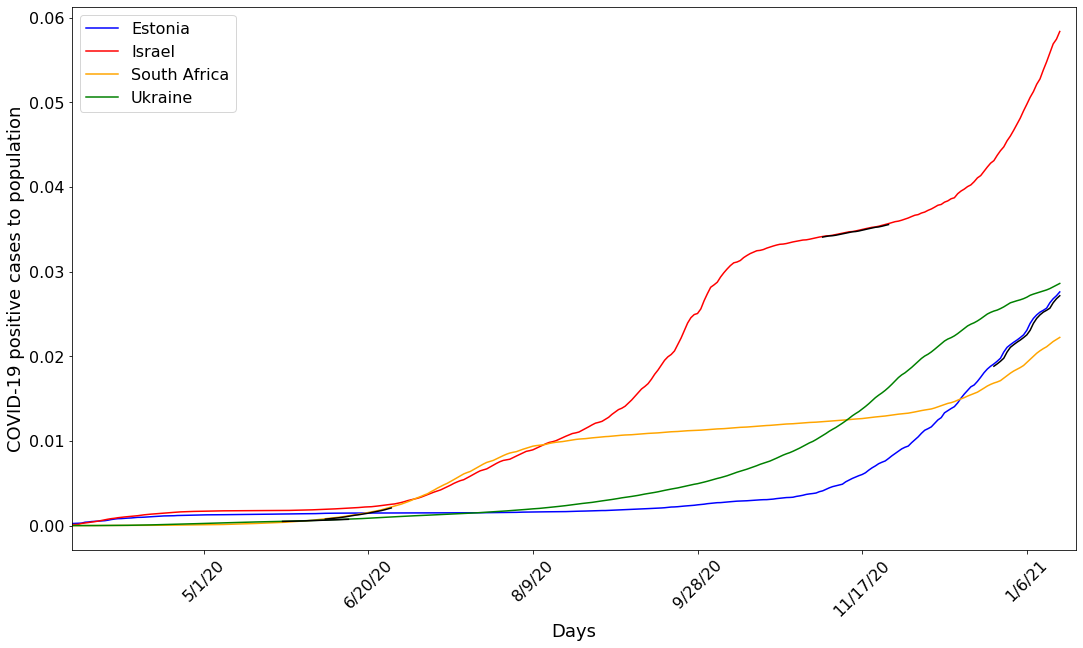

In [42]:
import matplotlib.pyplot as plt
import numpy as np
df3.plot(color = ["blue", "red", "orange", "green", "black", "black", "black", "black", "black"], kind = 'line', figsize = (18,10), rot = 45)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=20)
plt.xlim(60, 365)
plt.xlabel('Days', fontsize=18)
plt.ylabel('COVID-19 positive cases to population', fontsize=18)
plt.legend(('Estonia', 'Israel', 'South Africa', 'Ukraine'),fontsize = 16)

In [21]:
listike = [None] * 340
listike = listike + df.Estonia[339:360].tolist()
df['EestiLõik'] = listike

iisLoik1 = [None] * 288
iisVaartus = df.Israel[287:308].tolist()
iisLoik2 = [None] * 52
df['IisraelLoik'] = (iisLoik1 + iisVaartus + iisLoik2)

afrLoik1 = [None] * 137
afrVaartus = df['South Africa'][136:157].tolist()
afrLoik2 = [None] * 203
df['AfrLoik'] = (afrLoik1 + afrVaartus + afrLoik2)

ukrLoik1 = [None] * 124
ukrVaartus = df['Ukraine'][123:144].tolist()
ukrLoik2 = [None] * 216
df['UkrLoik'] = (ukrLoik1 + ukrVaartus + ukrLoik2)